___
# **Washington EV Market Exploratory Data Analysis**

This Notebook's purpose is to conduct analysis on the Washington EV Market to help the EV companies formulate a robust sales and expansion plan.

Dashboard Link: [Washington EV Market Dashboard](https://public.tableau.com/app/profile/muhammad.rafi.abhinaya/viz/WashingtonStateEVMarketDashboard/Dashboard1)
___

# **Business Understanding**

## **Background**
Electric Vehicles (EV) are taking over the otomotive industry globally and rapidly. According to various sources, The United States of America (USA) has the biggest EV market, just behind China. Refering to [statista.com](https://www.statista.com/outlook/mmo/electric-vehicles/united-states#key-market-indicators), the EV market in USA is expected to have a growth rate of 12.61%, which results to a projected market volume of US$154.2bn by 2029. Not only that, adoption of EVs by American citizens are growing, this is affected by increasing availability of EV models, government incentives, etc ([fortune business insights](https://www.fortunebusinessinsights.com/u-s-electric-vehicle-market-106396#:~:text=The%20share%20of%20electric%20vehicle,sales%20during%20the%20forecast%20period.)).

As a country with multiple states, the EV market differs from state by state. One of the leading states for the EV market share is Washington. According to [Clean Technica](https://cleantechnica.com/2025/05/14/top-us-states-for-ev-market-share-13-states-with-10-ev-share/), Washington holds the third place of the highest EV market share with 24.6%. In 2024, the Washington state EV market saw a significant increase in EV sales and registrations . The state experienced a 34% increase in registered EVs between 2023 and 2024 ([Washington State Department of Transportation](https://wsdot.wa.gov/about/data/gray-notebook/gnbhome/environment/electricvehicles/default.htm#:~:text=2024%20*%20The%20number%20of%20registered%20electric,of%20WSDOT's%20passenger%20vehicle%20fleet%20is%20electric.)). The department also reported that the state is actively investing in EV infrastructure, with 2,090 Level 2 charging stations and 386 fast charging stations available as of 2024. These facts shows that Washington has a big and growing market for EVs.

## **Problem Statement**
From the background above, it can be concluded that Washington State is prime target for sales and expansion for EV companies. But, a Washington EV market analysis is needed first to understand the current state of the EV market and customer EV preferences. In this project, I analyzed the Washington State Electric Vehicle market to uncover insights that can help EV companies strategize their sales and expansion plan better.

For better clarity, sub-problems will be defined for this analysis. These sub-problem will be the key to uncovering valuable insights from the Washington EV market. Here are the sub-problems:

1. **What is the current distribution of EVs across Counties in Washington?**
      
      Washington State has multiple counties, and population varies between counties. Knowing how is the EV distribution across counties will give us insights on which county should we target.

2. **Who are the five biggest EV manufacturers in Washington?**

      Knowing our competitor is important in entering a market. From this we can get a better understanding of the most common EV companies and the preferences of the customers.

3. **Which EV type is more prefered in Washington?**

      There are more than just one type of EVs. Knowing which type is more prefered in Washington can help the company come up with a better sales strategy.

4. **What are the five most common electric utility companies involved in EV infrastructure across counties in Washington State?**

      From this, we can identify key electric utilities supporting EV adoption and target collaboration opportunities to accelerate our company's EV growth.

5. **How is the current EV pricing situation in Washington State?**

      Knowing the current state of EVs prices will give a better idea on which kind of EVs are more prefered based on pricing.

6. **What is a statistically reliable average price range for selling EVs in Washington?**

      By knowing the this, we can safely conlude a price range where customers are more likely to purchase. Confidence interval can be used to find this range.


## **Dataset**
The data used for this analysis is from "Electric Vehicle Population Data 2024", Kaggle. This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL). The dataset was last updated in 2024, meaning the dataset highly relevant to the current time. The dataset contains 177,865 rows and 17 columns as follows:
| Column Name                                             | Description                                                                                           |
|---------------------------------------------------------|-------------------------------------------------------------------------------------------------------|
| `VIN (1-10)`                                            | The first 10 characters of the Vehicle Identification Number assigned to each vehicle for identification purposes. |
| `County`                                                | The county where the vehicle is registered in Washington State.                                       |
| `City`                                                  | The city where the vehicle is registered in Washington State.                                         |
| `State`                                                 | The state where the vehicle is registered, which is Washington in this case.                          |
| `Postal Code`                                           | The postal code of the registration address for the vehicle.                                          |
| `Model Year`                                            | The year in which the vehicle was manufactured.                                                       |
| `Make`                                                  | The manufacturer or brand of the vehicle.                                                             |
| `Model`                                                 | The specific model or name of the vehicle.                                                            |
| `Electric Vehicle Type`                                 | Indicates whether the vehicle is a Battery Electric Vehicle (BEV) or a Plug-in Hybrid Electric Vehicle (PHEV). |
| `Clean Alternative Fuel Vehicle (CAFV) Eligibility`     | Indicates if the vehicle meets the eligibility criteria for Clean Alternative Fuel Vehicle incentives or benefits. |
| `Electric Range`                                        | The distance the vehicle can travel on electric power alone, typically measured in miles.             |
| `Base MSRP`                                             | The Manufacturer's Suggested Retail Price, which is the starting price set by the vehicle manufacturer. |
| `Legislative District`                                  | The legislative district associated with the vehicle's registered address.                            |
| `DOL Vehicle ID`                                        | A unique identifier assigned by the Washington State Department of Licensing (DOL) for each registered vehicle. |
| `Vehicle Location`                                      | The precise location of the vehicle, which could be the address or coordinates.                       |
| `Electric Utility`                                      | The name of the electric utility company associated with the vehicle, if applicable.                  |
| `2020 Census Tract`                                     | The census tract associated with the vehicle's registered address, based on the 2020 Census data.     |


You can access the dataset [here](https://www.kaggle.com/datasets/utkarshx27/electric-vehicle-population-data/data).

___
# **Data Preparation**
To make sure the dataset is ready for analysis, we will conduct data preparation by doing data loading and data cleaning.

## **Data Loading**
Let's now load the data from the .csv file.

In [125]:
# import libaries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from IPython.display import display

In [126]:
# load dataset from directory
df = pd.read_csv('washington_ev_data.csv')

In [127]:
# show dataset
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [128]:
# show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177865 entries, 0 to 177864
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177865 non-null  object 
 1   County                                             177860 non-null  object 
 2   City                                               177860 non-null  object 
 3   State                                              177865 non-null  object 
 4   Postal Code                                        177860 non-null  float64
 5   Model Year                                         177865 non-null  int64  
 6   Make                                               177865 non-null  object 
 7   Model                                              177865 non-null  object 
 8   Electric Vehicle Type                              177865 non-null  object

From the output above we can see that the dataset has successfully been loaded. The dataset contains 177,866 rows and 17 columns. From the looks of it, we won't be needing all of the columns. We can filter the dataset to just take the columns that we need for the analysis. The column name also seems to be a bit complicated, therefore we will rename the columns later to simplify analysis. Other than that, there also seems to be some detected missing values.

In [129]:
# filter out unneeded columns
df_clean = df[['VIN (1-10)', 'County', 'City', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Base MSRP','Electric Utility']]

# show remaining columns
df_clean.columns

Index(['VIN (1-10)', 'County', 'City', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Base MSRP',
       'Electric Utility'],
      dtype='object')

Next, I noticed that the value inside column `Electrice Vehicle Type` is very long.

In [130]:
# check unique values
df_clean['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

To make it more readable, I'll change the values to BEV and PHEV.

Next, we will check for missing values.

In [131]:
# check for missing values
df_clean.isna().sum()

VIN (1-10)                                           0
County                                               5
City                                                 5
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Base MSRP                                            0
Electric Utility                                     5
dtype: int64

From the ouput above, there seems to be only three columns with missing values, and the nominal is very minimal. Let's check these rows.

In [132]:
# check for rows with missing values
df_clean.loc[df_clean.isna().any(axis=1)]

,VIN (1-10),County,City,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Base MSRP,Electric Utility
149244,5YJSA1E21J,NaN,NaN,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0,NaN
154552,5YJ3E1EA5K,NaN,NaN,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0,NaN
159156,5YJRE11B48,NaN,NaN,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,98950,NaN
167297,5YJXCAE24H,NaN,NaN,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0,NaN
170412,1N4AZ0CP1D,NaN,NaN,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0,NaN


The missing values (NaN) seems to show that the value of that column is unknown. Since there aren't that many of these rows, considering the huge amount of rows, we can just fill the missing values with 'unknown'.

But, some missing values seems to have gone undetected. If we check the `Base MSRP` column, there seems to be a value of 0. A value of 0 means that the car has a price of 0 USD, which is definely not true. Let's check how many rows have the value 0 in this column.

In [133]:
# number of rows per value
df_clean['Base MSRP'].value_counts()

Base MSRP
0         174522
69900       1370
31950        381
52900        222
32250        136
59900        128
54950        126
39995        113
36900        104
44100         92
45600         82
64950         81
33950         76
52650         68
34995         66
36800         55
55700         54
53400         37
81100         23
98950         20
110950        20
90700         19
75095         14
102000        13
184400        10
43700         10
89100          8
109000         7
91250          5
32995          3
Name: count, dtype: int64

From the ouput above, a big majority of the dataset seems to have the value 0 at the column `Base MSRP`. An EV having a base price of 0 is impossible, therefore it can be concluded that the value 0 indicates that the base MSRP is unknown. The Washington DOL, original source of the dataset, might have not known the bace MSRPs of these EVs, hence the value 0.

In [134]:
# check base MSRP of each model
df_clean.groupby(['Model', 'Base MSRP']).agg({'Base MSRP':'count'}).head(10)

Base MSRP
Model Base MSRP           
330E  0                271
      43700             10
      44100             92
      45600             82
500   0                784
530E  0                123
      52650             68
      53400             37
      54950            126
      55700             54

By grouping the dataset by `Model`, we can see that some EV models have multiple known base prices. While some others have no information of their base prices.

From our simple EDA above, we have checked the dataset for general information, filtered out columns, and checked for missing values. From this, here are the next steps that we need to take.
- Rename columns to simplify analysis.
- Rename values in column `Electric Vehicle Type` to make it more readable.
- Handle missing values as follow:
    - Missing values in column `County`, `City`, and `Electric Utility` will be filled with 'unknown'.
    - Undetected missing values in column `Base MSRP` will be handled as follow:
        - If the EV model has multiple `Base MSRP` unique values (including 0), rows that have a `Base MSRP` of 0 will be filled with the average of the other `Base MSRP` of the same model.
        - If the EV model only has a `Base MSRP` of 0, a big portion will be filled with a base price from external sources, while the smaller portion will be dropped. This decision will be further explained in the missing value handling section.

## **Data Cleaning**
The dataset will undergo data cleaning in order to make it better suited for analysis.

The first step is to reformat the column names.

In [135]:
# rename complex column names
df_clean = df_clean.rename(columns={'VIN (1-10)':'VIN',
                        'Electric Vehicle Type':'EV_Type',
                        'Clean Alternative Fuel Vehicle (CAFV) Eligibility':'CAFV_Eligibility'})

# substitute ' ' with '_'
df_clean.columns = [col.replace(' ', '_') for col in df_clean.columns]

# check column name
df_clean.columns

Index(['VIN', 'County', 'City', 'Make', 'Model', 'EV_Type', 'CAFV_Eligibility',
       'Base_MSRP', 'Electric_Utility'],
      dtype='object')

After that, we'll change the values is column `EV_Type` to make it more readable.

In [136]:
# change values
df_clean.loc[df_clean['EV_Type'] == 'Battery Electric Vehicle (BEV)', 'EV_Type'] = 'BEV'
df_clean.loc[df_clean['EV_Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)', 'EV_Type'] = 'PHEV'

# show unique values
df_clean['EV_Type'].unique()

array(['BEV', 'PHEV'], dtype=object)

Next, we will handle missing values in column `County`, `City`, and `Electric Utility` by filling it with 'unknown'

In [137]:
df_clean.fillna('unknown', inplace=True)

df_clean.isna().sum()

VIN                 0
County              0
City                0
Make                0
Model               0
EV_Type             0
CAFV_Eligibility    0
Base_MSRP           0
Electric_Utility    0
dtype: int64

Missing values at these columns has successfully been handled.

Next up is handling the undetected missing values in column `Base_MSRP`. We will first handle the missing values by filling it with the average of the other `Base_MSRP` of the same model. This method makes sense because the base price of each EVs shouldn't far differ from each other since they're from the same model.

In [138]:
# check number of rows and models with base msrp of 0
bfr = len(df_clean[df_clean['Base_MSRP']==0]['Model'])
bfr_u = len(df_clean[df_clean['Base_MSRP']==0]['Model'].unique())

# looping each model
for model in df_clean['Model'].unique():
    prices = df_clean[df_clean['Model'] == model]['Base_MSRP'].unique()         # check each model's uniqe base msrp
    if len(prices) > 1:                                                         # if there are multiple base msrp
        base_msrp = int(prices[1:].mean())                                      # calculate average base msrp excluding 0
        df_clean.loc[(df_clean['Base_MSRP'] == 0) & (df_clean['Model'] == model), 'Base_MSRP'] = base_msrp      # fill missing value with average base msrp

# check number of rows and models with base msrp of 0 after handling
aft = len(df_clean[df_clean['Base_MSRP']==0]['Model'])
aft_u = len(df_clean[df_clean['Base_MSRP']==0]['Model'].unique())

# show number of rows and models with base msrp of 0 befora and after handling
print(f'Before handling\nNumber of rows: {bfr}\nNumber of model with Base_MSRP of 0: {bfr_u}\n')
print(f'After handling\nNumber of rows: {aft}\nNumber of model with Base_MSRP of 0: {aft_u}')

Before handling
Number of rows: 174522
Number of model with Base_MSRP of 0: 132

After handling
Number of rows: 162300
Number of model with Base_MSRP of 0: 122


Eventhough we've handled some missing values, it seems that there are still some models where the `Base_MSRP` is still unknown. I was considering to fill the missing value with the average `Base_MSRP` of each manufacturer. But there will be too much data affected, which can lead to unreliable and biased results. Dropping all of these rows is still not an option, since many data will be lost. Therefore, the solution that I decided on is to fill the missing values with a base MSRP price received from external sources.

In [139]:
# rows filled with base msrp of 0 grouped by model
df0 = df_clean[df_clean['Base_MSRP']==0].groupby('Model').agg({'VIN':'count'}).sort_values('VIN', ascending=False)

# percentage of the rows of top 20 models compare to the total rows
percentage = df0.head(20).values.sum() / df0.values.sum() * 100

# show percentage
display(df0.head())
print(f'The top 20 models covers {percentage:.2f}% of the total rows with base msrp of 0\n')
print('Top 20 EV models:\n', [i for i in df0.head(20).index])

,VIN
Model,
MODEL Y,35989
MODEL 3,30092
LEAF,13366
BOLT EV,6821
MODEL X,5796


The top 20 models covers 81.26% of the total rows with base msrp of 0

Top 20 EV models:
 ['MODEL Y', 'MODEL 3', 'LEAF', 'BOLT EV', 'MODEL X', 'VOLT', 'ID.4', 'WRANGLER', 'MUSTANG MACH-E', 'NIRO', 'PRIUS PRIME', 'IONIQ 5', 'X5', 'RAV4 PRIME', 'EV6', 'R1S', 'I3', 'FUSION', 'BOLT EUV', 'R1T']


Searching for the base MSRP of 122 EV models will be very time consuming. If we check the EV models with missing values, we can see that the top 20 models with the highest rows of missing values holds 81% of the whole total of missing value rows. Since most of the data are from these 20 models, we can search the base msrp of these models, and drop the rest of the rows from other models. Dropping the other models will not impact the analysis by much because the amount of these models are not that significant to the total rows, proven by the percentage.

In conclusion, we fill the missing values of the top 20 models with the base MSRP price received from external sources, then drop/filter out the rest of the models with missing values. We will the access the top 20 model's base MSRP prices from the [base_msrp.csv](base_msrp.csv) file I've created.

In [170]:
# read base msrp price table
df_msrp = pd.read_csv('base_msrp.csv')

# looping the top 20 models
for model in df_msrp['Models'].unique():
    value = df_msrp[df_msrp['Models'] == model]['Base_MSRP'].values[0]                               # base msrp price of the model
    df_clean.loc[(df_clean['Base_MSRP'] == 0) & (df_clean['Model'] == model), 'Base_MSRP'] = value   # fill missing value

# drop the rest of the model with missing values
df_clean  = df_clean[df_clean['Base_MSRP'] > 0]

# check for rows with base msrp 0
zero = len(df_clean[df_clean['Base_MSRP'] == 0])
print(f'Rows with base MSRP of 0: {zero}')

Rows with base MSRP of 0: 0


In [141]:
# check dataset info after data cleaning
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147448 entries, 0 to 177864
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   VIN               147448 non-null  object
 1   County            147448 non-null  object
 2   City              147448 non-null  object
 3   Make              147448 non-null  object
 4   Model             147448 non-null  object
 5   EV_Type           147448 non-null  object
 6   CAFV_Eligibility  147448 non-null  object
 7   Base_MSRP         147448 non-null  int64 
 8   Electric_Utility  147448 non-null  object
dtypes: int64(1), object(8)
memory usage: 11.2+ MB


This concludes the data cleaning process. Throughout the process, we have reformated the column names and handled the missing values, notably the missing values from the `Base_MSRP` column. The remaining number of rows after data cleaning is 147,448 rows.

# **Exploratory Data Analysis**
After cleaning the data, we are now able to conduct analysis. This analysis aims to answer each sub-problems that we've defined in the business understanding section.

## **1. What is the current distribution of EVs across Counties in Washington?**
Washington has multiple counties, where each county have different interest in EVs, some will have more and some will have less. We wouldn't want to expand into a county that have small interest, therefore we need to see each countys interest in EVs. We will calculate this by counting the number of registered EVs in each county.

In [143]:
# EV count grouped by county
df1 = df_clean.groupby('County',as_index=False).agg({'VIN':'count'}).sort_values('VIN',ascending=False)

# load US counties shapefile
counties = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_20m.zip")

# filter for Washington state only (FIPS code 53)
wa_counties = counties[counties['STATEFP'] == '53']

# merge on county name
choropleth = wa_counties.merge(df1, left_on='NAME', right_on='County')

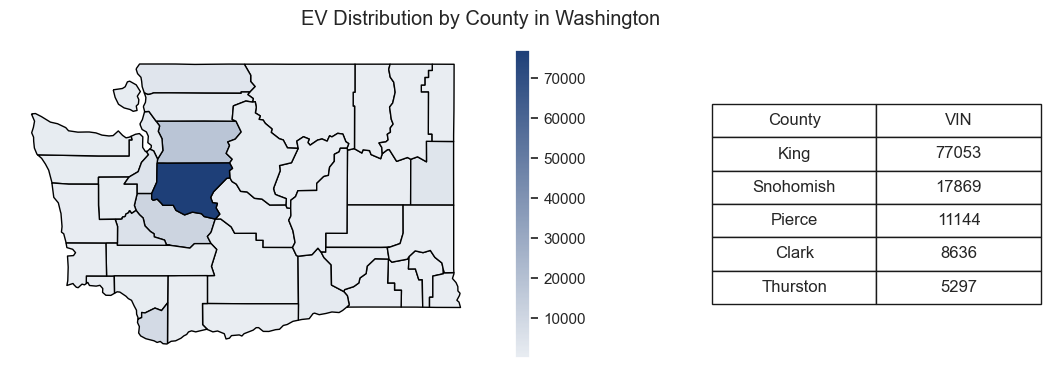

In [144]:
# create figure
fig, ax = plt.subplots(ncols=2, figsize=(14,4), gridspec_kw={'width_ratios': [2, 1]})
fig.suptitle('EV Distribution by County in Washington',ha='center')

# create choropleth chart
palette = sns.blend_palette(["#E9EDF2",'#1E3F78'], as_cmap=True)
choropleth.plot(column='VIN', cmap=palette, legend=True, edgecolor='black',ax=ax[0])
ax[0].axis('off')

# create table for clarity
table = ax[1].table(cellText=df1.head(5).values, colLabels=df1.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)
ax[1].axis('off')

# show chart
plt.show()

From the chart above, we are able to see that the EV distribution in Washington State is centralized in King County by a large amount. This means, the citizens of King County have the highest interest in owning an EV. Therefore, we can conclude that King County has the highest EV sales potential and is a great target for expansion. 

## **2. Who are the five biggest EV manufacturers by EV count in Washington?**

We are planning to enter a market where there are already competitors selling their respective products. Knowing our competitors can give us insights on which manufacturers we need to look out for, such as which manufacturer has the most EV count in Washington. Knowing this, we can analyze how they attract customers to further create a better sales and expansion strategy of our own.

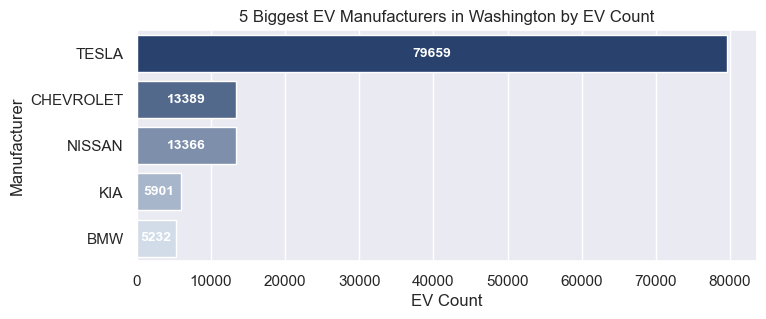

In [172]:
# EV count grouped by manufacturers
df2 = df_clean.groupby('Make',as_index=False).agg({'VIN':'count'}).sort_values('VIN',ascending=False).head()

# create barchart
plt.figure(figsize = (8,3))
palette = sns.blend_palette(['#1E3F78',"#CDDCEC"], n_colors=len(df2))
ax = sns.barplot(x=df2['VIN'], y=df2['Make'], data=df2, palette=palette)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center',
                 color='white', weight='bold', fontsize=10)
plt.title('5 Biggest EV Manufacturers in Washington by EV Count')
sns.set(style='darkgrid')
plt.xlabel('EV Count')
plt.ylabel('Manufacturer')

# show chart
plt.show()


From the chart above, we are able to see the five biggest EV manufacturers in Washington by EV count. Tesla seems to hold the lead by a lot with a total of 79,659 EV's across Washington state, followed by Chevrolet and Nissan with around 13,300 EVs. From this, we can conclude that Tesla dominates the Washington EV market and we need to keep them in mind while strategizing an expansion and sales plan.

## **3. Which EV type is more prefered in Washington?**
There are mainly two types of EVs in Washington, A plug-in hybrid EV (PHEV) and a battery EV (BEV). These two differ in the way they work and both have their advantages and disadvantages. We need to know which type is more prefered by the citizens to come up a better sales strategy.

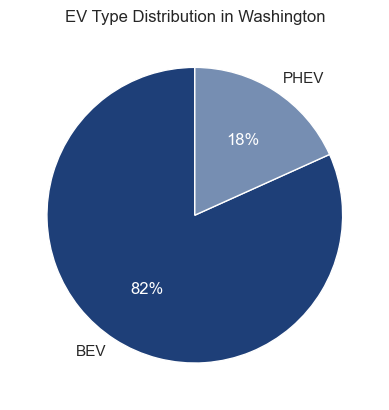

In [171]:
# EV count grouped by EV type
df3 = df_clean.groupby('EV_Type', as_index=False).agg({'VIN':'count'})

# create pie chart
palette = sns.blend_palette(['#1E3F78',"#CDDCEC"], n_colors=3)
plt.pie(df3['VIN'], labels=df3['EV_Type'], startangle=90,)
plt.pie(df3['VIN'], colors=palette,startangle=90, autopct='%.0f%%',textprops={'color':'White'})
plt.title('EV Type Distribution in Washington')

# show chart
plt.show()

Out of the the 147,448 EV's in Washington State, 82% of them seems to be from the BEV type. This shows that the citizens have a siginificantly higher preference towards BEVs instead of PHEV. This means, we should focus our sales towards BEVs since they hava the higher demand in Washington State.

## **4. What are the five most common electric utility companies involved in EV infrastructure across counties in Washington State?**
There are multiple electric utility companies supporting the growth of EVs in Washington State. By knowing which are the biggest companies, we can identify key electric utilities supporting EV adoption and target collaboration to accelerate our EV growth.

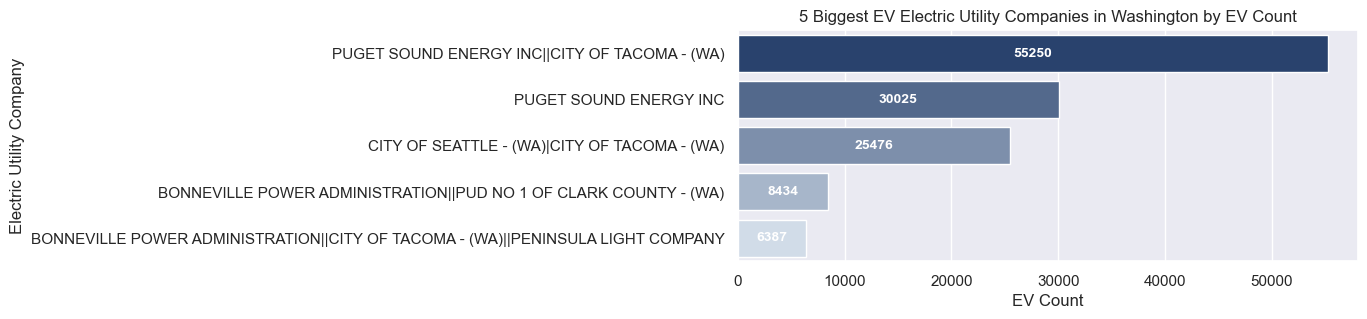

In [173]:
# EV count grouped by Electric Utility
df4 = df_clean.groupby('Electric_Utility',as_index=False).agg({'VIN':'count'}).sort_values('VIN', ascending=False).head()

# create barchart
plt.figure(figsize = (8,3))
palette = sns.blend_palette(['#1E3F78',"#CDDCEC"], n_colors=len(df4))
ax = sns.barplot(x=df4['VIN'], y=df4['Electric_Utility'], data=df4, palette=palette)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center',
                 color='white', weight='bold', fontsize=10)
plt.title('5 Biggest EV Electric Utility Companies in Washington by EV Count')
sns.set(style='darkgrid')
plt.xlabel('EV Count')
plt.ylabel('Electric Utility Company')

# show chart
plt.show()

From the chart, we can see that the company with the highest associated EVs count is Puget Sound Energy Inc, specifically from the City of Tacoma, with over 55,000 associated EVs. The second highest also seems to from the same company but a different branch. This shows that Puges Sound Energy Inc is big stakeholder of the EVs in Washington State, and we should aim to build partnerships with them when we expand to the state.

## **5. How is the current EV pricing situation in Washington State?**
When entering a new market, we should conduct price analysis to see how's the current pricing situation. To understand better the pricing of EVs in Washington State, we'll descriptive statistics to get the central tendency and disperion of EV prices.

In [ ]:
# calculate central tendency
print(f'Average EV Price: US$ {df_clean.Base_MSRP.mean():.2f}')
print(f'EV price median: US$ {df_clean.Base_MSRP.median():.2f}')
print(f'Most common EV price: US$ {df_clean.Base_MSRP.mode()[0]:.2f}')

Lowest EV Price: US$ 16975.00
Highest EV Price: US$ 184400.00
Average EV Price: US$ 43704.58
EV price median: US$ 42490.00
Most common EV price: US$ 43990.00


The average price of EVs owned by citizens is US$ 43,704.58, while the median is US$ 42,490.00., and the most common price is US$ 43,990.00. This shows that the customers are catered toward EV's that are priced around the US$ 40,000 range.

Next we'll check the spread of EV prices by using dispersion tests.

Lowest EV Price: US$ 16975.00
Highest EV Price: US$ 184400.00
Standard deviation: US$ 14100.39
Skewness: 1.92


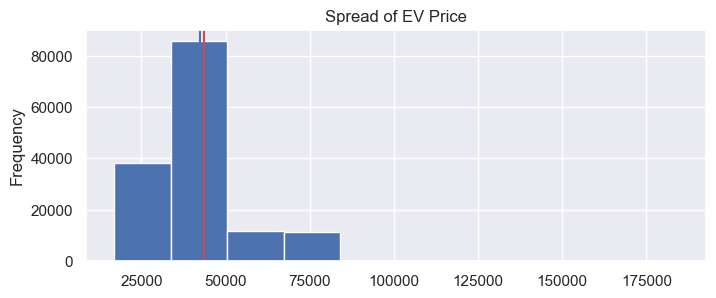

In [165]:
# calculate price range
print(f'Lowest EV Price: US$ {min(df_clean.Base_MSRP):.2f}')
print(f'Highest EV Price: US$ {max(df_clean.Base_MSRP):.2f}')

# calculate dispersion
print(f'Standard deviation: US$ {df_clean.Base_MSRP.std():.2f}')
print(f'Skewness: {df_clean.Base_MSRP.skew():.2f}')

# melihat sebaran data menggunakan histogram
plt.figure(figsize = (8,3))
df_clean['Base_MSRP'].plot(kind='hist',bins=10)
plt.title('Spread of EV Price')
plt.axvline(df_clean['Base_MSRP'].mean(), color = 'r')
plt.axvline(df_clean['Base_MSRP'].median(), color = 'b')

# show chart
plt.show()

From the output above, it can be seen that EV price in Washington State ranges from US$ 16,975 to US$ 184,400. Next, the standard deviation of prices from the mean is around US$ 14,100.39. And Finally the skewness of the the spread of prices is 1.92, this value shows that the price doesn't hava normal distribution and has right skewness, meaning that there is high extreme value price. 

Let's check for outliers. Because the data doesn't have a normal distribution, we'll use Tukey's rule to check for outliers.

Outlier percentage: 14.76%


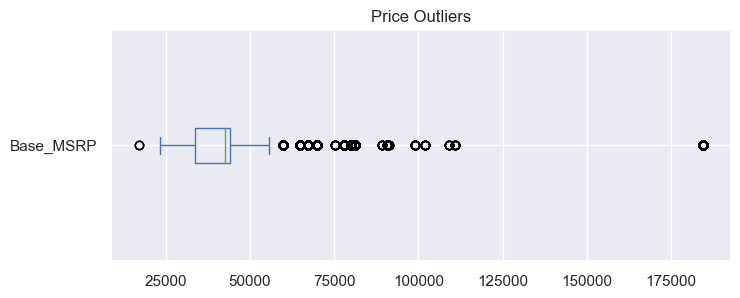

In [168]:
# calculate quantile nominals
q1 = np.percentile(df_clean['Base_MSRP'], 25)
q2 = np.median(df_clean['Base_MSRP'])
q3 = np.percentile(df_clean['Base_MSRP'], 75)

# calculate iqr, lower fence, and upper fence
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

# filter outliers only
outlier = df_clean[(df_clean['Base_MSRP'] < lower_fence) | (df_clean['Base_MSRP'] > upper_fence)]

# calculate outlier percentage
percentage = len(outlier)/len(df_clean)*100

# ouput calculations
print(f'Outlier percentage: {percentage:.2f}%')

# boxplot to see outliers
plt.figure(figsize = (8,3))
df_clean['Base_MSRP'].plot(kind='box', vert=False)
plt.title('Price Outliers')

# show chart
plt.show()

From the output above, we can see that 14.76% percent of our price data are outliers. Eventhough there are outliers, we will not be handling them. Because in this context, these outliers represent how the current pricing situation is. There will be EVs that have higher prices than others, so we will still represent them by not removing these outliers.

## **6. What is a statistically reliable average price range for selling EVs in Washington?**
Knowing the EV pricing situation, we also need to decide how much should we sell our EVs for. To understand the range of price that we should target, we'll use confidence interval to calculate the lower and higher price boundary that we should target.

In [152]:
# calculate standard deviation
std = df_clean['Base_MSRP'].std()

# number of rows
N = len(df_clean)

# calculate upper and lower limit
low, up = stats.norm.interval(0.95,loc=df_clean['Base_MSRP'].mean(),scale=std/np.sqrt(N))

# show calculation
print(f'Lower bound price of EVs: US$ {low:.2f}')
print(f'Higher bound price of EVs: US$ {up:.2f}')

Lower bound price of EVs: US$ 43632.61
Higher bound price of EVs: US$ 43776.55


From the output, we can see that the ideal range to price our EVs ranges from US$ 43,637.26 to US$ 43,782.77. This supports the previous statement that customers are catered toward EV's that are priced around the US$ 40,000 range.

# **Summary**
The analysis of the Washington State EV market has been completed, here are several key insights that we uncovered:
- **EV Distribution Centralizes in King County**: Having the highest number of EV users, King County represents a prime target for market entry and expansion.
- **Tesla Dominates the EV Market**: Tesla holds the largest share of the EV market in Washington. Studying their sales strategy could provide valuable insights for positioning and growth.
- **BEVs are the Most Common EVs**: BEVs significantly outperform Plug-in Hybrid Electric Vehicles (PHEVs) in terms of demand. The company should prioritize BEVs in its product lineup.
- **Puget Sound Energy Inc. is the Top Electric Utility Company**: As the utility provider with the highest number of associated EVs, partnering with Puget Sound Energy could enhance infrastructure support and market reach.
- **EV Prices Averages around US$ 40,000**: Most EV owners in the state opt for vehicles priced around $40,000. Based on our analysis, the optimal price range for launching our EVs is between $43,637.26 and $43,782.77.

# **Reccomendations**
From the insights that we uncovered, here are some recommendations I can give to EV companies that are aiming to expand into Washington State:
1. **Target Market Entry in King County**  
   Begin expansion efforts in **King County**, which hosts the largest concentration of electric vehicle (EV) users in Washington State. This area offers high visibility and early adopter advantages.

2. **Prioritize Battery Electric Vehicles (BEVs)**  
   Focus on offering **Battery Electric Vehicles (BEVs)** over Plug-in Hybrid Electric Vehicles (PHEVs), as BEVs demonstrate stronger demand and align more closely with the region’s sustainability goals.

3. **Study Tesla’s Market Positioning**  
   Use **Tesla’s strategy** as a benchmark for brand positioning and consumer engagement. Their success in similar markets provides valuable insights for establishing competitive presence.

4. **Collaborate with Puget Sound Energy (PSE)**  
   Partner with **Puget Sound Energy** to support infrastructure development, such as charging stations and grid enhancements. This will help ensure smoother adoption and customer satisfaction.

5. **Competitive Pricing Strategy**  
   Set vehicle pricing within the range of **$43,637.26 to $43,782.77**, which aligns with consumer expectations and current market trends in the region.
